In [2]:
print("Be motivated Ganapathy")

Be motivated Ganapathy


In [ ]:
##Dataset creation

In [21]:
import pandas as pd
import numpy as np

arr=np.array([["Dhoni",1,2,3,4],["Virat",3,4,5,2]])
df=pd.DataFrame(arr,columns=['name','1s','2s','4s','6s'])
df

,name,1s,2s,4s,6s
0,Dhoni,1,2,3,4
1,Virat,3,4,5,2


In [22]:
##Random Dataset creation

In [32]:
import pandas as pd 
import numpy as np

df=pd.DataFrame({"mn":range(1,11),
                    "n4":np.random.randint(1,20,size=10),
                    "n6":np.random.randint(1,10,size=10)
                   })

,mn,n4,n6
0,1,16,7
1,2,10,2
2,3,8,5
3,4,13,4
4,5,5,3
5,6,17,6
6,7,7,7
7,8,15,2
8,9,3,3
9,10,9,2


Text(0, 0.5, 'runs')

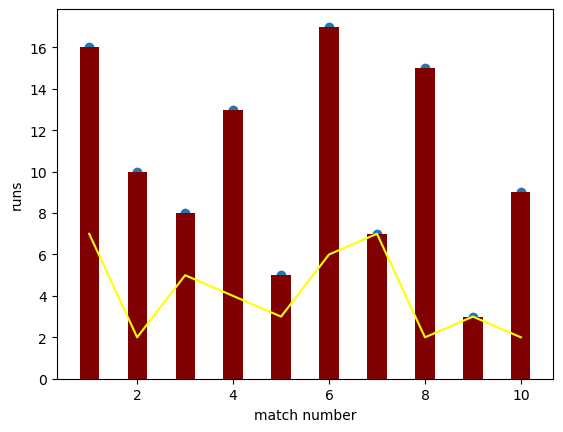

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df["mn"],df["n4"])
plt.plot(df.mn,df.n6,color="yellow")
plt.bar(df.mn,df.n4,color="maroon",width=0.4)
plt.xlabel("match number")
plt.ylabel("runs")

In [ ]:
##Linear Regression

In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lm=pd.read_csv("db/income.csv")
x=lm[["year"]]
y=lm["pci"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8754252138052113

In [ ]:
##Naive Bayes

In [129]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df=pd.read_csv('db/titanic.csv')
df=df[['Pclass','Age','Survived']]
df['Age']=df.Age.fillna(df.Age.mean())
df
x=df.drop('Survived',axis='columns')
y=df.Survived
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
gb=GaussianNB()
gb.fit(xtrain,ytrain)
print(gb.score(xtest,ytest))

0.6547085201793722


In [130]:
##Decision Tree

0.6983240223463687


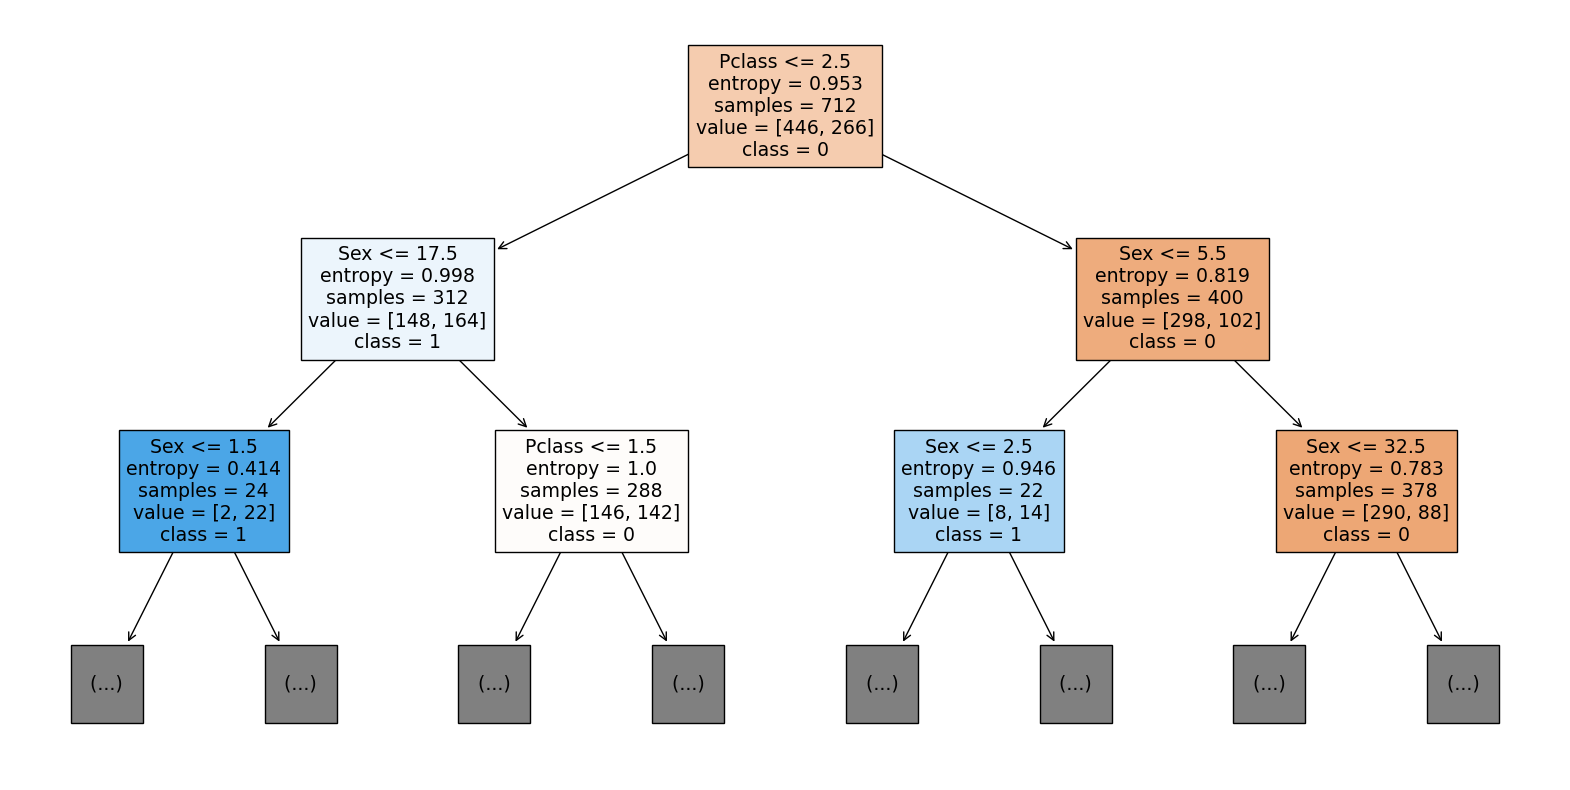

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt


df=pd.read_csv('db/titanic.csv')
df=df[['Pclass','Age','Survived']]
df['Age']=df.Age.fillna(df.Age.mean())
df
x=df.drop('Survived',axis='columns')
y=df.Survived
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=15)
# C4.5
# dc=tree.DecisionTreeClassifier(splitter='best',criterion='entropy',random_state=15)
# id3
# dc=tree.DecisionTreeClassifier(criterion='entropy',random_state=15)
#cart
# dc=tree.DecisionTreeClassifier(criterion='gini',random_state=15)

dc.fit(X_train,Y_train)
print(dc.score(X_test,Y_test))
plt.figure(figsize=(20,10))
tree.plot_tree(dc,filled=True,feature_names=X.columns,class_names=['0','1'],max_depth=2)
plt.show()

In [ ]:
##K means clustering

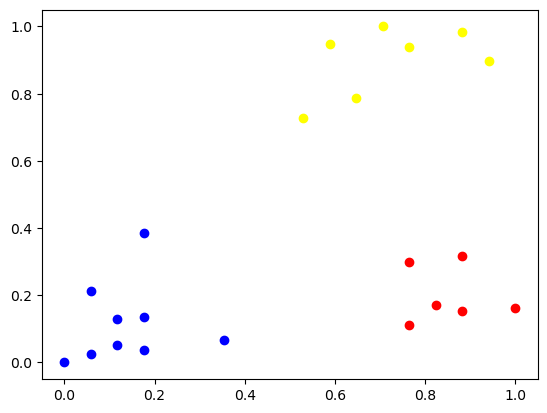

In [198]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('db/kmeansincome.csv')

scalar=MinMaxScaler()
scalar.fit(data[['Age']])
data['Age']=scalar.transform(data[['Age']])
scalar.fit(data[['Income']])
data['Income']=scalar.transform(data[['Income']])
x=data['Age']
y=data.Income

km=KMeans(n_clusters=3)
data['cluster']=km.fit_predict(data[['Age','Income']])
df0=data[data.cluster==0]
df1=data[data.cluster==1]
df2=data[data.cluster==2]
plt.scatter(df0.Age,df0.Income,color="red")
plt.scatter(df1.Age,df1.Income,color="blue")
plt.scatter(df2.Age,df2.Income,color="yellow")

In [78]:
##Multilayer perceptron

In [17]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X,y=make_classification(n_samples=100,n_features=10,random_state=15)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)
model=MLPClassifier(max_iter=100000,random_state=15)
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.92


In [16]:
##Reinforcement Learning

In [199]:
import numpy as np
import gym

# Define the Q-learning function
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    # Initialize the Q-table to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    # Loop over episodes
    for episode in range(num_episodes):
        # Reset the environment
        state = env.reset()
        
        # Initialize the total reward for this episode
        total_reward = 0
        
        # Loop over time steps in this episode
        done = False
        while not done:
            # Choose an action using an epsilon-greedy policy
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # explore
            else:
                action = np.argmax(Q[state])  # exploit
            
            # Take the chosen action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)
            
            # Update the Q-table
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            
            # Update the total reward
            total_reward += reward
            
            # Update the state for the next iteration
            state = next_state
        
        # Print the total reward for this episode
        print(f"Episode {episode + 1}: Total reward = {total_reward}")
        
    return Q


# Create the environment
env = gym.make('Taxi-v3')

# Set the hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run the Q-learning algorithm
Q = q_learning(env, num_episodes, alpha, gamma, epsilon)

# Close the environment
env.close()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
##Support Vector Machine

In [33]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df=pd.read_csv('DB/url.csv')
# print(df)
X=df.drop(columns=["Domain","Label"])
# print(X)
y=df['Label']
# print(y)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.75,random_state=15)
model=SVC()
# model=SVC(kernel='linear',random_state=15)
# model1=SVC(kernel='rbf',random_state=15)
model.fit(xtrain,ytrain)
# model1.fit(xtrain,ytrain)
# print(model1.score(xtest,ytest))
print(model.score(xtest,ytest))

0.8182666666666667


In [35]:
##Bagging - Random Forest Classifier

In [131]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("db/url.csv")
X=df.drop(columns=["Domain","Label"])
y=df['Label']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.75)


model=RandomForestClassifier(n_estimators=5,random_state=15)
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))
# i=0
# for tree in model.estimators_:
#     prediction=tree.predict(xtest)
#     print(f"Iteration:{i} {'Not malicious' if prediction[0]==0 else 'Malicious'}")
#     i+=1
    

0.8426666666666667


In [ ]:
##Boosting - common code

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('db/url.csv')
X = data.drop(columns=['Domain','Label'],axis = 1)
Y = data['Label']
xtrain,xtest,ytrain,ytest= train_test_split(X, Y, test_size=0.3)

In [114]:
##ADA boosting

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
# ada=AdaBoostClassifier(learning_rate=0.3)
ada.fit(xtrain,ytrain)
ada.score(xtest,ytest)

0.8083333333333333

In [121]:
##Gradient Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.2)
gbc.fit(xtrain,ytrain)
gbc.score(xtest,ytest)

0.8546666666666667

In [128]:
##LG boosting

In [13]:
# !pip install lightgbm
from lightgbm import LGBMClassifier
# lgbm=LGBMClassifier()
lgbm=LGBMClassifier(learning_rate=0.3)
lgbm.fit(xtrain,ytrain)
lgbm.score(xtest,ytest)

0.8596666666666667

In [134]:
##Categorical Boosting

In [16]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb.fit(xtrain,ytrain)
print(cb.score(xtrain,ytrain))

Learning rate set to 0.023648
0:	learn: 0.6680605	total: 3.76ms	remaining: 3.76s
1:	learn: 0.6456306	total: 7.81ms	remaining: 3.9s
2:	learn: 0.6257160	total: 10.9ms	remaining: 3.63s
3:	learn: 0.6085758	total: 14.4ms	remaining: 3.6s
4:	learn: 0.5916941	total: 18.1ms	remaining: 3.6s
5:	learn: 0.5775085	total: 21.7ms	remaining: 3.59s
6:	learn: 0.5634850	total: 25.1ms	remaining: 3.56s
7:	learn: 0.5506626	total: 28.8ms	remaining: 3.57s
8:	learn: 0.5398792	total: 31.7ms	remaining: 3.49s
9:	learn: 0.5302093	total: 35.2ms	remaining: 3.49s
10:	learn: 0.5206805	total: 38.8ms	remaining: 3.49s
11:	learn: 0.5124428	total: 42.3ms	remaining: 3.48s
12:	learn: 0.5050919	total: 45.7ms	remaining: 3.47s
13:	learn: 0.4976658	total: 49.1ms	remaining: 3.46s
14:	learn: 0.4913593	total: 52.7ms	remaining: 3.46s
15:	learn: 0.4854644	total: 56.4ms	remaining: 3.46s
16:	learn: 0.4804225	total: 60.2ms	remaining: 3.48s
17:	learn: 0.4753395	total: 63.8ms	remaining: 3.48s
18:	learn: 0.4708018	total: 67.7ms	remaining: 3

188:	learn: 0.3477749	total: 750ms	remaining: 3.22s
189:	learn: 0.3475894	total: 755ms	remaining: 3.22s
190:	learn: 0.3475102	total: 759ms	remaining: 3.22s
191:	learn: 0.3474634	total: 764ms	remaining: 3.22s
192:	learn: 0.3471012	total: 771ms	remaining: 3.22s
193:	learn: 0.3468886	total: 776ms	remaining: 3.22s
194:	learn: 0.3467003	total: 780ms	remaining: 3.22s
195:	learn: 0.3466719	total: 785ms	remaining: 3.22s
196:	learn: 0.3466285	total: 789ms	remaining: 3.21s
197:	learn: 0.3465731	total: 794ms	remaining: 3.21s
198:	learn: 0.3462672	total: 798ms	remaining: 3.21s
199:	learn: 0.3461352	total: 803ms	remaining: 3.21s
200:	learn: 0.3460161	total: 807ms	remaining: 3.21s
201:	learn: 0.3459443	total: 812ms	remaining: 3.21s
202:	learn: 0.3457967	total: 816ms	remaining: 3.2s
203:	learn: 0.3455790	total: 821ms	remaining: 3.2s
204:	learn: 0.3455744	total: 824ms	remaining: 3.19s
205:	learn: 0.3454253	total: 828ms	remaining: 3.19s
206:	learn: 0.3451293	total: 832ms	remaining: 3.19s
207:	learn: 0.

356:	learn: 0.3274979	total: 1.55s	remaining: 2.79s
357:	learn: 0.3274287	total: 1.55s	remaining: 2.79s
358:	learn: 0.3274137	total: 1.56s	remaining: 2.78s
359:	learn: 0.3271560	total: 1.56s	remaining: 2.78s
360:	learn: 0.3270936	total: 1.57s	remaining: 2.78s
361:	learn: 0.3268740	total: 1.57s	remaining: 2.77s
362:	learn: 0.3267308	total: 1.58s	remaining: 2.77s
363:	learn: 0.3267301	total: 1.58s	remaining: 2.77s
364:	learn: 0.3266947	total: 1.59s	remaining: 2.76s
365:	learn: 0.3266279	total: 1.59s	remaining: 2.76s
366:	learn: 0.3265605	total: 1.6s	remaining: 2.75s
367:	learn: 0.3263652	total: 1.6s	remaining: 2.75s
368:	learn: 0.3262672	total: 1.61s	remaining: 2.75s
369:	learn: 0.3262650	total: 1.61s	remaining: 2.74s
370:	learn: 0.3261451	total: 1.62s	remaining: 2.74s
371:	learn: 0.3261179	total: 1.62s	remaining: 2.74s
372:	learn: 0.3260214	total: 1.63s	remaining: 2.73s
373:	learn: 0.3258624	total: 1.63s	remaining: 2.73s
374:	learn: 0.3258344	total: 1.64s	remaining: 2.73s
375:	learn: 0.

550:	learn: 0.3174571	total: 2.56s	remaining: 2.08s
551:	learn: 0.3174409	total: 2.56s	remaining: 2.08s
552:	learn: 0.3174368	total: 2.57s	remaining: 2.08s
553:	learn: 0.3173781	total: 2.57s	remaining: 2.07s
554:	learn: 0.3173629	total: 2.58s	remaining: 2.07s
555:	learn: 0.3173591	total: 2.58s	remaining: 2.06s
556:	learn: 0.3173527	total: 2.59s	remaining: 2.06s
557:	learn: 0.3173255	total: 2.6s	remaining: 2.06s
558:	learn: 0.3172674	total: 2.6s	remaining: 2.05s
559:	learn: 0.3172403	total: 2.61s	remaining: 2.05s
560:	learn: 0.3172101	total: 2.61s	remaining: 2.04s
561:	learn: 0.3171814	total: 2.62s	remaining: 2.04s
562:	learn: 0.3171775	total: 2.62s	remaining: 2.04s
563:	learn: 0.3170518	total: 2.63s	remaining: 2.03s
564:	learn: 0.3170340	total: 2.63s	remaining: 2.03s
565:	learn: 0.3170195	total: 2.64s	remaining: 2.02s
566:	learn: 0.3169926	total: 2.65s	remaining: 2.02s
567:	learn: 0.3169871	total: 2.65s	remaining: 2.02s
568:	learn: 0.3169810	total: 2.66s	remaining: 2.01s
569:	learn: 0.

732:	learn: 0.3112771	total: 3.58s	remaining: 1.3s
733:	learn: 0.3112397	total: 3.59s	remaining: 1.3s
734:	learn: 0.3112141	total: 3.59s	remaining: 1.29s
735:	learn: 0.3111656	total: 3.6s	remaining: 1.29s
736:	learn: 0.3111299	total: 3.6s	remaining: 1.29s
737:	learn: 0.3111198	total: 3.61s	remaining: 1.28s
738:	learn: 0.3110887	total: 3.62s	remaining: 1.28s
739:	learn: 0.3110440	total: 3.62s	remaining: 1.27s
740:	learn: 0.3110183	total: 3.63s	remaining: 1.27s
741:	learn: 0.3110078	total: 3.64s	remaining: 1.26s
742:	learn: 0.3109862	total: 3.64s	remaining: 1.26s
743:	learn: 0.3109663	total: 3.65s	remaining: 1.25s
744:	learn: 0.3109637	total: 3.65s	remaining: 1.25s
745:	learn: 0.3109606	total: 3.66s	remaining: 1.25s
746:	learn: 0.3109475	total: 3.66s	remaining: 1.24s
747:	learn: 0.3109296	total: 3.67s	remaining: 1.24s
748:	learn: 0.3109270	total: 3.67s	remaining: 1.23s
749:	learn: 0.3109244	total: 3.68s	remaining: 1.23s
750:	learn: 0.3109121	total: 3.69s	remaining: 1.22s
751:	learn: 0.31

927:	learn: 0.3078470	total: 4.59s	remaining: 356ms
928:	learn: 0.3078405	total: 4.59s	remaining: 351ms
929:	learn: 0.3078404	total: 4.59s	remaining: 346ms
930:	learn: 0.3078399	total: 4.6s	remaining: 341ms
931:	learn: 0.3078304	total: 4.61s	remaining: 336ms
932:	learn: 0.3078098	total: 4.61s	remaining: 331ms
933:	learn: 0.3077980	total: 4.62s	remaining: 326ms
934:	learn: 0.3077921	total: 4.62s	remaining: 321ms
935:	learn: 0.3077738	total: 4.63s	remaining: 316ms
936:	learn: 0.3077724	total: 4.63s	remaining: 312ms
937:	learn: 0.3077618	total: 4.64s	remaining: 307ms
938:	learn: 0.3077562	total: 4.64s	remaining: 302ms
939:	learn: 0.3077573	total: 4.65s	remaining: 297ms
940:	learn: 0.3077575	total: 4.65s	remaining: 292ms
941:	learn: 0.3077576	total: 4.66s	remaining: 287ms
942:	learn: 0.3077485	total: 4.66s	remaining: 282ms
943:	learn: 0.3077474	total: 4.67s	remaining: 277ms
944:	learn: 0.3077356	total: 4.67s	remaining: 272ms
945:	learn: 0.3077126	total: 4.68s	remaining: 267ms
946:	learn: 0